In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [2]:
df = pd.read_csv("./diabetes_dataset.csv")
num_samples, num_features = df.drop(["Outcome"], axis=1).shape
print(num_samples, num_features)
df.head()

2000 8


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], shape=(2000, 1))

In [5]:
scale_columns = [1, 2, 3, 4, 5, 7]  # cols index: Glucose, BP, Skin, Insulin, BMI, Age
scaler = StandardScaler()
X_train[:, scale_columns] = scaler.fit_transform(X_train[:, scale_columns])
X_test[:, scale_columns] = scaler.transform(X_test[:, scale_columns])

In [6]:
X_train

array([[ 0.        , -0.60171383,  0.87459814, ..., -0.3616138 ,
         0.695     , -0.52199275],
       [ 2.        , -0.97799321,  0.02557033, ..., -0.6088394 ,
         0.085     , -0.9417698 ],
       [ 1.        , -0.88392336,  0.02557033, ..., -0.22563971,
         0.315     , -0.85781439],
       ...,
       [ 5.        ,  0.46441106,  0.66234119, ..., -3.98346884,
         0.64      ,  3.00413441],
       [ 2.        , -0.66442706, -0.08055815, ...,  0.77562397,
         0.324     , -0.60594816],
       [ 5.        ,  1.27968303,  1.82975443, ...,  0.67673373,
         0.151     ,  1.57689246]], shape=(1600, 8))

In [7]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [8]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
model = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
    )
model

Sequential(
  (0): Linear(in_features=8, out_features=1, bias=True)
  (1): Sigmoid()
)

In [10]:
loss_fn = nn.BCELoss()
loss_fn

BCELoss()

In [11]:
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [12]:
n_epochs = 100
loss_train_hist, acc_train_hist = [], []

In [13]:
for epoch in range(n_epochs):

  mean_loss_train, mean_acc_train = 0, 0

  for x_batch, y_batch in train_loader:

    # model
    y_hat = model(x_batch)

    # loss
    loss = loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.round() == y_batch).item()

  mean_loss_train = mean_loss_train / len(train_dataset)
  mean_acc_train = mean_acc_train / len(train_dataset)

  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)

  print(
  f"Epoch: {epoch}   "
  f"LossTrain: {mean_loss_train:.2}   "
  f"AccTrain: {mean_acc_train:.2}   "
  )

Epoch: 0   LossTrain: 0.63   AccTrain: 0.67   
Epoch: 1   LossTrain: 0.58   AccTrain: 0.71   
Epoch: 2   LossTrain: 0.57   AccTrain: 0.72   
Epoch: 3   LossTrain: 0.56   AccTrain: 0.72   
Epoch: 4   LossTrain: 0.55   AccTrain: 0.73   
Epoch: 5   LossTrain: 0.54   AccTrain: 0.74   
Epoch: 6   LossTrain: 0.54   AccTrain: 0.74   
Epoch: 7   LossTrain: 0.54   AccTrain: 0.74   
Epoch: 8   LossTrain: 0.53   AccTrain: 0.75   
Epoch: 9   LossTrain: 0.53   AccTrain: 0.75   
Epoch: 10   LossTrain: 0.53   AccTrain: 0.75   
Epoch: 11   LossTrain: 0.52   AccTrain: 0.75   
Epoch: 12   LossTrain: 0.52   AccTrain: 0.75   
Epoch: 13   LossTrain: 0.52   AccTrain: 0.75   
Epoch: 14   LossTrain: 0.52   AccTrain: 0.75   
Epoch: 15   LossTrain: 0.51   AccTrain: 0.75   
Epoch: 16   LossTrain: 0.51   AccTrain: 0.74   
Epoch: 17   LossTrain: 0.51   AccTrain: 0.75   
Epoch: 18   LossTrain: 0.51   AccTrain: 0.75   
Epoch: 19   LossTrain: 0.51   AccTrain: 0.75   
Epoch: 20   LossTrain: 0.51   AccTrain: 0.75   
Ep

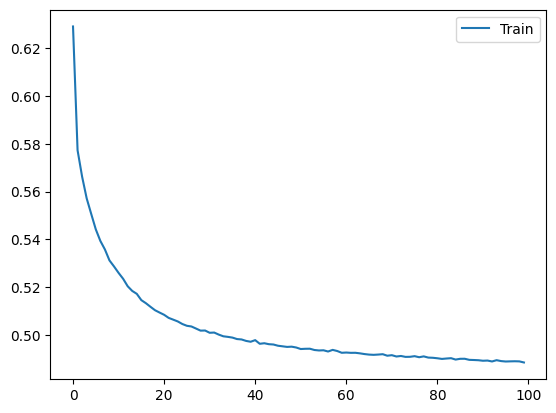

In [14]:
plt.plot(torch.arange(n_epochs), loss_train_hist)
plt.legend(["Train"]);

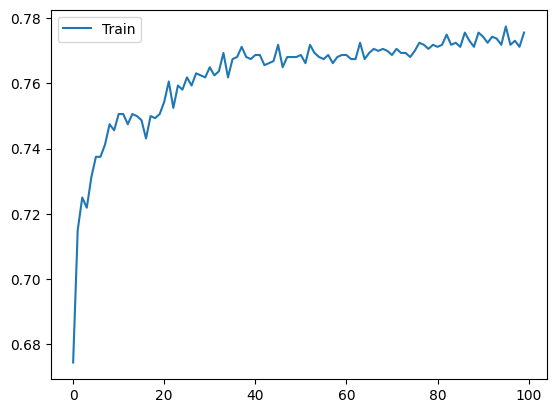

In [15]:
plt.plot(torch.arange(n_epochs), acc_train_hist)
plt.legend(["Train"]);

In [16]:
mean_acc_test = 0

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
    mean_acc_test += torch.sum(y_hat.round() == y_batch).item()
  mean_acc_test = mean_acc_test / len(test_dataset)

mean_acc_test

0.8